# Lab 4: Text classification with Logistic Regression & SVMs
## Report By: Aseem Shaikh/ 3177031

In this lab assignment, we aim to develop and evaluate text classification models using the "20newsgroups" dataset. The dataset comprises approximately 20,000 newsgroup documents, partitioned across 20 different categories. Our objective is to classify these documents into their respective categories using two popular machine learning algorithms: Logistic Regression and Support Vector Machines (SVMs).

The primary tasks of this lab include preprocessing and vectorizing the text data, training the classification models, and evaluating their performance using a variety of metrics such as accuracy, precision, recall, F1-score, and confusion matrix. Additionally, we will compare the execution time of both models to understand their computational efficiency.

By the end of this lab, we aim to recommend the best performing model based on our evaluation and suggest potential improvements for enhancing model performance. This exercise not only reinforces the practical application of machine learning algorithms in text classification but also emphasizes the importance of model evaluation and selection in predictive analytics.

# Dependencies

In [34]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import time


# Load dataset

In [19]:
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

# Data Analysis

In [31]:
# Finding frequency of each category
targets, frequency = np.unique(newsgroups.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984,
        990, 987, 997, 910, 940, 775, 628], dtype=int64))

In [32]:
targets_str = np.array(newsgroups.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 799), ('comp.graphics', 973), ('comp.os.ms-windows.misc', 985), ('comp.sys.ibm.pc.hardware', 982), ('comp.sys.mac.hardware', 963), ('comp.windows.x', 988), ('misc.forsale', 975), ('rec.autos', 990), ('rec.motorcycles', 996), ('rec.sport.baseball', 994), ('rec.sport.hockey', 999), ('sci.crypt', 991), ('sci.electronics', 984), ('sci.med', 990), ('sci.space', 987), ('soc.religion.christian', 997), ('talk.politics.guns', 910), ('talk.politics.mideast', 940), ('talk.politics.misc', 775), ('talk.religion.misc', 628)]


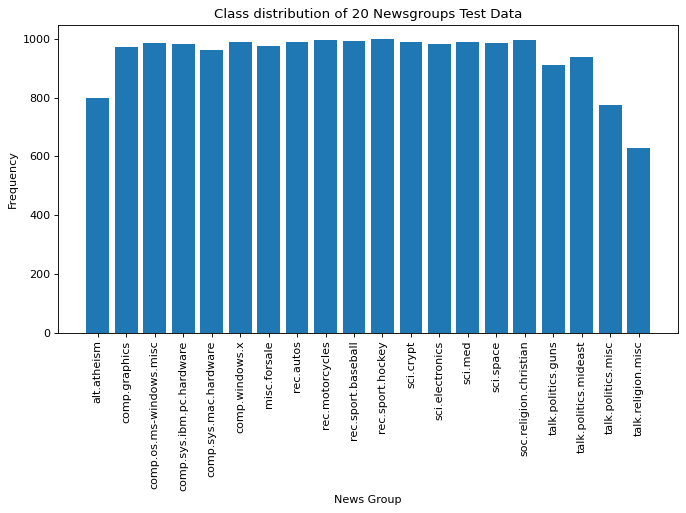

In [35]:
# Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

# Text vectorization

In [42]:
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Split data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Logistic Regression

In [44]:
start_time = time.time()
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_time = time.time() - start_time

# SVM

In [47]:
start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_time = time.time() - start_time

# Evaluation

In [46]:
#Metrics of the Model Logistic Regression
start_time = time.time()
log_y_pred= lr_model.predict(X_test)
pred_lr_time = time.time()- start_time
print('Metrics on Logistic Regression')
print('Accuracy',accuracy_score(y_test, log_y_pred))
print('Precision', precision_score(y_test, log_y_pred, average='weighted'))
print('Recall', recall_score(y_test, log_y_pred, average='weighted'))
print('F1 Score', f1_score(y_test, log_y_pred, average='weighted'))
print(f'Time to fit {lr_time} seconds and time to predict {pred_lr_time} seconds')
print('Confusion Matrix', classification_report(y_test, log_y_pred))

Metrics on Logistic Regression
Accuracy 0.9005305039787799
Precision 0.901713859254396
Recall 0.9005305039787799
F1 Score 0.9003991962431792
Time to fit 103.20635986328125 seconds and time to predict 0.06683850288391113 seconds
Confusion Matrix               precision    recall  f1-score   support

           0       0.89      0.90      0.89       151
           1       0.79      0.87      0.83       202
           2       0.83      0.83      0.83       195
           3       0.72      0.76      0.74       183
           4       0.90      0.85      0.88       205
           5       0.89      0.86      0.87       215
           6       0.84      0.83      0.83       193
           7       0.91      0.94      0.93       196
           8       0.97      0.93      0.95       168
           9       0.97      0.97      0.97       211
          10       0.96      0.97      0.97       198
          11       0.98      0.95      0.96       201
          12       0.85      0.87      0.86       20

# Analysis of Logistic Regession Model
- The model correctly classified 90.05% of the test samples.
- The precision score indicates that out of all the positive predictions made by the model, 90.17% were correct.
- The recall score shows that the model correctly identified 90.05% of the actual positives in the dataset.
- The F1 score, which is the harmonic mean of precision and recall, is 90.04%, indicating a good balance between precision and recall.
- The training time was relatively long, indicating that the model took a significant amount of time to fit the data.
- The prediction time is very short, making the model efficient in real-time classification scenarios.
- For instance, class 0 (support 151) has a precision of 0.89 and a recall of 0.90, indicating that most of the predictions for this class are accurate.

In [49]:
#Metrics of the model support vector machines
start_time = time.time()
svm_y_pred= svm_model.predict(X_test)
pred_svm_time = time.time()- start_time
print('Metrics on support vector machines')
print('Accuracy',accuracy_score(y_test, svm_y_pred))
print('Precision', precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall', recall_score(y_test, svm_y_pred, average='weighted'))
print('F1 Score', f1_score(y_test, svm_y_pred, average='weighted'))
print(f'Time to fit {svm_time} seconds and time to predict {pred_svm_time} seconds')
print('Confusion Matrix', classification_report(y_test, svm_y_pred))

Metrics on support vector machines
Accuracy 0.9092838196286472
Precision 0.9127350700517521
Recall 0.9092838196286472
F1 Score 0.9100450104324941
Time to fit 407.3038513660431 seconds and time to predict 54.016698598861694 seconds
Confusion Matrix               precision    recall  f1-score   support

           0       0.93      0.90      0.91       151
           1       0.74      0.89      0.81       202
           2       0.88      0.84      0.86       195
           3       0.75      0.78      0.76       183
           4       0.92      0.88      0.90       205
           5       0.91      0.85      0.88       215
           6       0.85      0.87      0.86       193
           7       0.92      0.94      0.93       196
           8       0.99      0.94      0.97       168
           9       0.97      0.99      0.98       211
          10       0.98      0.95      0.97       198
          11       0.99      0.94      0.96       201
          12       0.81      0.90      0.85      

# Analysis of Support Vector Machines (SVM) Model Evaluation
- The SVM model correctly classified 90.93% of the test samples, which is slightly higher than the Logistic Regression model.
- The precision score indicates that out of all the positive predictions made by the model, 91.27% were correct, which is slightly higher than Logistic Regression
- The recall score shows that the model correctly identified 90.93% of the actual positives in the dataset, which is again slightly higher than Logistic Regression.
- The F1 score, which is the harmonic mean of precision and recall, is 91.00%, indicating a balanced performance between precision and recall.
- The training time for the SVM model is significantly longer than the Logistic Regression model, indicating a higher computational cost.
- The prediction time is also significantly longer than Logistic Regression, which could be a consideration for real-time applications.

# Comparision of Logistic Regression Model and Support Vector Machine Model

| Metric              | Logistic Regression                  | Support Vector Machines (SVM)        |
|---------------------|--------------------------------------|--------------------------------------|
| Accuracy        | 0.9005                               | 0.9093                               |
| Precision       | 0.9017                               | 0.9127                               |
| Recall          | 0.9005                               | 0.9093                               |
| F1 Score        | 0.9004                               | 0.9100                               |
| Time to Fit     | 103.21 seconds                       | 407.30 seconds                       |
| Time to Predict | 0.067 seconds                        | 54.02 seconds                        |
| Macro Avg       | Precision: 0.90, Recall: 0.90, F1: 0.90 | Precision: 0.91, Recall: 0.91, F1: 0.91 |
| Weighted Avg    | Precision: 0.90, Recall: 0.90, F1: 0.90 | Precision: 0.91, Recall: 0.91, F1: 0.91 |

### Summary
- Accuracy: Both models have high accuracy, but SVM has a slight edge over Logistic Regression.
- Precision, Recall, and F1 Score: SVM also performs slightly better in these metrics, indicating a better balance and slightly higher performance across the board.
- Time to Fit and Predict: Logistic Regression is significantly faster both in training and prediction times. SVM is computationally more expensive, which might be a consideration for large datasets or real-time applications.
- Class-wise Performance: Both models perform well across most classes, but SVM generally shows better precision, recall, and F1 scores for individual classes, especially in challenging ones like class 1 and 19.

### Conclusion
SVM generally performs better than Logistic Regression in terms of accuracy, precision, recall, and F1 score but at the cost of much higher computational time. If this application needs to be developed for accuracy purpose then Support Vector Method is the best model.

# Improvement to the model
- Address Training and Prediction Time: Techniques like parallel processing or using a more efficient kernel (e.g., linear kernel if applicable) could help.
- Class Imbalance and Difficult Classes: Techniques such as over-sampling, under-sampling, or using class weights can be considered.